<h1>Ejercicio de Electromiografía</h1>
    <p>En este ejercicio trabajarás con datos que vienen de un experimento en el que se midió actividad muscular con la técnica de la Electromiografía en el brazo derecho de varios participantes cuando éstos realizaban un movimiento con la mano entre siete posibles: 
        <ul>
            <li>Flexionar hacia arriba</li>
            <li>Flexionar hacia abajo</li>
            <li>Cerrar la mano</li>
            <li>Estirar la mano</li>
            <li>Abrir la mano</li>
            <li>Coger un objeto</li>
            <li>No moverse</li>
        </ul>
    Al igual que en el ejercicio anterior, los datos se cargan con la función <code>loadtxt</code> de numpy. La primera columna corresponde a la clase (1, 2, 3, 4, 5, 6, y 7), la segunda columna se ignora, y el resto de las columnas indican las variables que se calcularon de la respuesta muscular. El archivo de datos con el que trabajarás depende de tu matrícula.</p>
    
<h2>Para este conjunto de datos:</h2>
<ol>
    <li>Determina si es necesario balancear los datos. En caso de que sea afirmativo, en todo este ejercicio tendrás que utilizar alguna estrategia para mitigar el problema de tener una muestra desbalanceada.</li>
    <li>Evalúa al menos 8 modelos de clasificación distintos utilizando validación cruzada, y determina cuál de ellos es el más efectivo.</li>
    <li>Escoge al menos dos clasificadores que hayas evaluado en el paso anterior e identifica sus hiperparámetros. Lleva a cabo el proceso de validación cruzada anidada para evaluar los dos modelos con la selección óptima de hiperparámetros.</li>
    <li>Prepara tus modelos para producción haciendo lo siguiente:
        <ul>
            <li>Obtén los hiperparámetros óptimos utilizando todo el conjunto de datos con validación cruzada.</li>
            <li>Con los hiperparámetros óptimos, ajusta el modelo con todos los datos.</li>
        </ul>
    </li>
</ol>

<h2>Contesta lo siguiente:</h2>
<ul>
    <li>¿Observas un problema en cuanto al balanceo de las clases? ¿Por qué?</li>
    <li>¿Qué modelo o modelos fueron efectivos para clasificar tus datos? ¿Observas algo especial sobre los modelos? Argumenta tu respuesta.</li>
    <li>¿Observas alguna mejora importante al optimizar hiperparámetros? ¿Es el resultado que esperabas? Argumenta tu respuesta.</li>
    <li>¿Qué inconvenientes hay al encontrar hiperparámetros? ¿Por qué?</li>
</ul>

<h3>Nota:</h3>
<p>El conjunto de datos con el que trabajarás en este ejercicio depende del penúltimo número de tu matrícula de acuerdo a la siguiente lista:</p>
<ul>
    <li>0 y 1 - <a href="M_1.txt" download>M_1.txt</a></li>
    <li>2 y 3 - <a href="M_2.txt" download>M_2.txt</a></li>
    <li>4 y 5 - <a href="M_3.txt" download>M_3.txt</a></li>
    <li>6 y 7 - <a href="M_4.txt" download>M_4.txt</a></li>
    <li>8 y 9 - <a href="M_5.txt" download>M_5.txt</a></li>
</ul>

In [45]:
import numpy as np
import pandas as pd
import random
import numpy.linalg as ln
from sklearn.metrics import recall_score, accuracy_score, precision_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [46]:
dataset=np.loadtxt('data/problem2/M_3.txt')
dataset=np.delete(dataset,1,1)
dataset

array([[ 1.        , -1.55867656,  1.10831223, ...,  0.29210038,
        -0.43529413,  1.38408176],
       [ 1.        , -1.97820748,  0.05529825, ...,  0.13460537,
        -0.66363906,  1.23454479],
       [ 1.        , -2.00252079,  0.26738123, ...,  0.20743235,
        -0.56334261,  1.04644538],
       ...,
       [ 7.        , -4.94456697, -6.99475503, ..., -1.32610563,
        -0.60156025, -5.29772693],
       [ 7.        , -3.65328964, -7.63221775, ..., -1.68888044,
        -0.2974711 , -5.37944   ],
       [ 7.        , -4.6666576 , -7.71443058, ..., -1.74725351,
        -0.37124767, -5.16867606]])

In [47]:
x=dataset[:,1:]
x

array([[-1.55867656,  1.10831223,  0.36259013, ...,  0.29210038,
        -0.43529413,  1.38408176],
       [-1.97820748,  0.05529825, -0.27335023, ...,  0.13460537,
        -0.66363906,  1.23454479],
       [-2.00252079,  0.26738123,  0.26316986, ...,  0.20743235,
        -0.56334261,  1.04644538],
       ...,
       [-4.94456697, -6.99475503, -5.09065357, ..., -1.32610563,
        -0.60156025, -5.29772693],
       [-3.65328964, -7.63221775, -4.1068933 , ..., -1.68888044,
        -0.2974711 , -5.37944   ],
       [-4.6666576 , -7.71443058, -4.91212317, ..., -1.74725351,
        -0.37124767, -5.16867606]])

In [48]:
y=dataset[:,0]
y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3.

<h3>1. Determina si es necesario balancear los datos. En caso de que sea afirmativo, en todo este ejercicio tendrás que utilizar alguna estrategia para mitigar el problema de tener una muestra desbalanceada.</h3>

In [49]:
# División de los datos en conjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Entrenamiento del clasificador
classifier = LogisticRegression(C=1.0, solver='liblinear')
classifier.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [50]:
# Predicción en el conjunto de prueba
y_pred = classifier.predict(x_test)

# Calcular el recall para cada clase (de 1 a 7)
recall_per_class = {}
for class_label in range(1, 8):
    recall = recall_score(y_test, y_pred, labels=[class_label], average='macro', zero_division=0)
    recall_per_class[class_label] = recall
    print(f"Recall for class {class_label}: {recall}")

# Calcular la precisión (accuracy) global
accuracy = accuracy_score(y_test, y_pred)
print(f"Overall Accuracy: {accuracy}")

Recall for class 1: 1.0
Recall for class 2: 1.0
Recall for class 3: 0.967741935483871
Recall for class 4: 1.0
Recall for class 5: 1.0
Recall for class 6: 0.8333333333333334
Recall for class 7: 1.0
Overall Accuracy: 0.9735449735449735


1. Desempeño del Modelo: El modelo muestra un alto recall para casi todas las clases (alrededor de 1.0) y una exactitud global del 97%. Esto indica un buen desempeño general.

2. Recall por Clase: El recall para la clase 6 es un poco más bajo (0.83), pero aún aceptable. Las otras clases tienen recalls perfectos o casi perfectos.

3. Distribución de Clases: Si la cantidad de ejemplos entre clases no está extremadamente desbalanceada, el balanceo de datos podría no ser necesario.

4. Impacto del Balanceo: Métodos de balanceo pueden alterar la distribución original del dataset y, dado el buen rendimiento actual, podrían no ser necesarios.

5. Contexto del Problema: Si el impacto de errores en la clase 6 no es crítico, y el desempeño general es satisfactorio, el balanceo de datos podría no ser justificable.

Conclusión: Dado el alto desempeño del modelo en general y un recall aceptable para la clase minoritaria, no es necesario usar métodos de balanceo de datos.

<h3>2. Evalúa al menos 8 modelos de clasificación distintos utilizando validación cruzada, y determina cuál de ellos es el más efectivo.</h3>

In [51]:
class ModelResults:
    def __init__(self, name, report):
        self.name = name
        self.report = report

    def __toString__(self):
        return f"ModelResults(name={self.name}\n {self.report})\n"


In [52]:
def performCrossValidation(n_folds=10, modelName="", model=None):
    print("#######################################")
    print(modelName)
    print("#######################################")
    print("\n")
    try:
        # k-fold cross-validation using cross_val_predict
        n_folds = 5
        y_pred = cross_val_predict(model, x, y, cv=n_folds)
        report = classification_report(y, y_pred)
        return modelName, report


    except Exception as e:
        print(f"An error occurred during cross-validation: {e}")
        return modelName, ""  # Return None values in case of an error

In [53]:
models = {
    "SVC": SVC(kernel='linear', C=1.0),  # C is the regularization parameter
    "RandomForestClassifier": RandomForestClassifier(n_estimators=100, max_depth=5),
    # n_estimators is the number of trees, max_depth is the max depth of the tree
    "GradientBoostingClassifier": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1),
    # learning_rate shrinks the contribution of each tree
    "LogisticRegression": LogisticRegression(C=1.0, solver='liblinear'),
    # C is the inverse of regularization strength, solver is the algorithm to use in the optimization problem
    "DecisionTreeClassifier": DecisionTreeClassifier(max_depth=4),  # max_depth is the maximum depth of the tree
    "KNeighborsClassifier": KNeighborsClassifier(n_neighbors=5),  # n_neighbors is the number of neighbors to use
    "GaussianNB": GaussianNB(var_smoothing=1e-9),
    # var_smoothing is the portion of the largest variance of all features that is added to variances for calculation stability
    "AdaBoostClassifier": AdaBoostClassifier(n_estimators=50, learning_rate=1.0)
    # n_estimators is the number of trees, learning_rate shrinks the contribution of each classifier
}

listOfModelResults = []
for name, model in models.items():
    name, report = performCrossValidation(n_folds=10, modelName=name, model=model)
    listOfModelResults.append(ModelResults(name, report))

#######################################
SVC
#######################################


#######################################
RandomForestClassifier
#######################################


#######################################
GradientBoostingClassifier
#######################################


#######################################
LogisticRegression
#######################################


#######################################
DecisionTreeClassifier
#######################################


#######################################
KNeighborsClassifier
#######################################


#######################################
GaussianNB
#######################################


#######################################
AdaBoostClassifier
#######################################




In [54]:
for model in listOfModelResults:
    print(model.__toString__())

ModelResults(name=SVC
               precision    recall  f1-score   support

         1.0       0.96      0.98      0.97        90
         2.0       0.97      0.99      0.98        90
         3.0       0.94      0.91      0.93        90
         4.0       1.00      1.00      1.00        90
         5.0       0.99      0.96      0.97        90
         6.0       0.93      0.94      0.94        90
         7.0       0.93      0.94      0.94        90

    accuracy                           0.96       630
   macro avg       0.96      0.96      0.96       630
weighted avg       0.96      0.96      0.96       630
)

ModelResults(name=RandomForestClassifier
               precision    recall  f1-score   support

         1.0       0.91      0.93      0.92        90
         2.0       0.77      0.73      0.75        90
         3.0       0.96      0.79      0.87        90
         4.0       0.99      0.94      0.97        90
         5.0       0.94      0.92      0.93        90
         6.

In [55]:
# Define the model results
model_results = {
    "SVC": {"accuracy": 0.96, "precision": 0.96, "recall": 0.96, "f1-score": 0.96},
    "RandomForestClassifier": {"accuracy": 0.87, "precision": 0.87, "recall": 0.87, "f1-score": 0.87},
    "GradientBoostingClassifier": {"accuracy": 0.88, "precision": 0.89, "recall": 0.88, "f1-score": 0.89},
    "LogisticRegression": {"accuracy": 0.96, "precision": 0.96, "recall": 0.96, "f1-score": 0.96},
    "DecisionTreeClassifier": {"accuracy": 0.60, "precision": 0.58, "recall": 0.60, "f1-score": 0.58},
    "KNeighborsClassifier": {"accuracy": 0.94, "precision": 0.95, "recall": 0.94, "f1-score": 0.94},
    "GaussianNB": {"accuracy": 0.81, "precision": 0.81, "recall": 0.81, "f1-score": 0.81},
    "AdaBoostClassifier": {"accuracy": 0.37, "precision": 0.45, "recall": 0.37, "f1-score": 0.37},
}

# Convert model results to a DataFrame
df = pd.DataFrame(model_results).T

# Calculate the average score for each model
df['average_score'] = df.mean(axis=1)

# Sort models by average score
sorted_df = df.sort_values(by='average_score', ascending=False)

sorted_df

,accuracy,precision,recall,f1-score,average_score
SVC,0.96,0.96,0.96,0.96,0.9600
LogisticRegression,0.96,0.96,0.96,0.96,0.9600
KNeighborsClassifier,0.94,0.95,0.94,0.94,0.9425
GradientBoostingClassifier,0.88,0.89,0.88,0.89,0.8850
RandomForestClassifier,0.87,0.87,0.87,0.87,0.8700
GaussianNB,0.81,0.81,0.81,0.81,0.8100
DecisionTreeClassifier,0.60,0.58,0.60,0.58,0.5900
AdaBoostClassifier,0.37,0.45,0.37,0.37,0.3900


<h3>3. Escoge al menos dos clasificadores que hayas evaluado en el paso anterior e identifica sus hiperparámetros. Lleva a cabo el proceso de validación cruzada anidada para evaluar los dos modelos con la selección óptima de hiperparámetros.</h3>

----- KNN classifier - K parameter -----
---- k = 1
ACC: 0.9555555555555555
---- k = 2
ACC: 0.9619047619047618
---- k = 3
ACC: 0.9634920634920634
---- k = 4
ACC: 0.9698412698412697
---- k = 5
ACC: 0.9666666666666666
---- k = 6
ACC: 0.9714285714285713
---- k = 7
ACC: 0.9682539682539684
---- k = 8
ACC: 0.9634920634920634
---- k = 9
ACC: 0.9634920634920634
---- k = 10
ACC: 0.965079365079365
---- k = 11
ACC: 0.9539682539682539
---- k = 12
ACC: 0.9587301587301587
---- k = 13
ACC: 0.9492063492063492
---- k = 14
ACC: 0.9539682539682539
---- k = 15
ACC: 0.9492063492063492
---- k = 16
ACC: 0.9444444444444444
---- k = 17
ACC: 0.946031746031746
---- k = 18
ACC: 0.9444444444444444
---- k = 19
ACC: 0.9349206349206348
---- k = 20
ACC: 0.9317460317460317
---- k = 21
ACC: 0.9349206349206348
---- k = 22
ACC: 0.9365079365079365
---- k = 23
ACC: 0.9349206349206349
---- k = 24
ACC: 0.9317460317460317
---- k = 25
ACC: 0.9285714285714286
---- k = 26
ACC: 0.9317460317460317
---- k = 27
ACC: 0.930158730158730

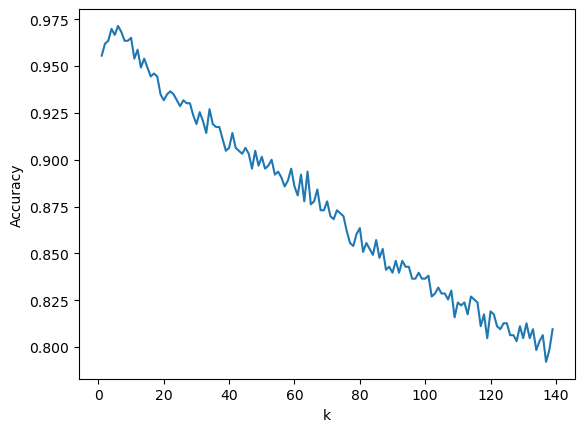

KNeighborsClassifier(n_neighbors=6)

In [56]:
print("----- KNN classifier - K parameter -----")

kk = np.arange(1,140)

acc = []

for k in kk:
    print('---- k =', k)
    
    acc_cv = []

    kf = StratifiedKFold(n_splits=5, shuffle = True)

    for train_index, test_index in kf.split(x, y):
    
        # Training phase
        x_train = x[train_index, :]
        y_train = y[train_index]     

        clf_cv = KNeighborsClassifier(n_neighbors=k)             

        clf_cv.fit(x_train, y_train)

        # Test phase
        x_test = x[test_index, :]
        y_test = y[test_index]
        y_pred = clf_cv.predict(x_test)    
        
        acc_i = accuracy_score(y_test, y_pred)
        acc_cv.append(acc_i)    

    acc_hyp = np.average(acc_cv)
    acc.append(acc_hyp)
    
    print('ACC:', acc_hyp)

opt_index = np.argmax(acc)
opt_hyperparameter = kk[opt_index]
print("Optimal k: ", opt_hyperparameter)

plt.plot(kk, acc)
plt.xlabel("k")
plt.ylabel("Accuracy")

plt.show()

# Fit model with optimal hyperparameters
clf = KNeighborsClassifier(n_neighbors=opt_hyperparameter)   
clf.fit(x, y)

----- SVM classifier - Regularization parameter -----
---- C = 0.001
ACC: 0.9714285714285713
---- C = 0.0010974987654930556
ACC: 0.9761904761904763
---- C = 0.0012045035402587824
ACC: 0.9746031746031745
---- C = 0.0013219411484660286
ACC: 0.9746031746031745
---- C = 0.0014508287784959402
ACC: 0.9698412698412697
---- C = 0.0015922827933410922
ACC: 0.9730158730158729
---- C = 0.001747528400007683
ACC: 0.9793650793650794
---- C = 0.0019179102616724887
ACC: 0.9730158730158729
---- C = 0.00210490414451202
ACC: 0.9746031746031745
---- C = 0.0023101297000831605
ACC: 0.9777777777777779
---- C = 0.0025353644939701114
ACC: 0.9746031746031745
---- C = 0.0027825594022071257
ACC: 0.976190476190476
---- C = 0.0030538555088334154
ACC: 0.9777777777777776
---- C = 0.003351602650938841
ACC: 0.9777777777777776
---- C = 0.0036783797718286343
ACC: 0.976190476190476
---- C = 0.004037017258596553
ACC: 0.980952380952381
---- C = 0.004430621457583882
ACC: 0.980952380952381
---- C = 0.004862601580065354
ACC: 0.

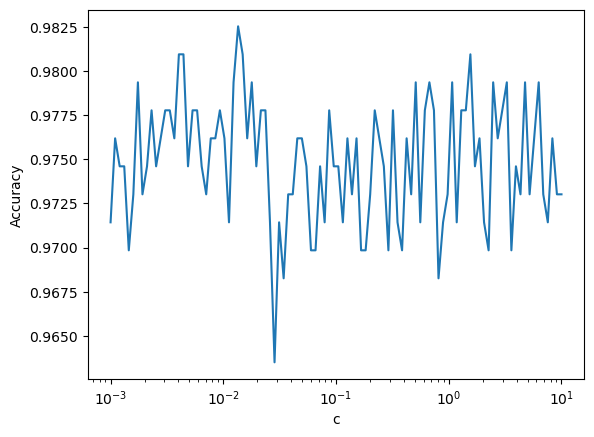

SVC(C=0.013530477745798075, kernel='linear')

In [57]:
#------------------------------------------------------------------------------------------------------------------
# Regularization parameter of the linear SVM classifier
#------------------------------------------------------------------------------------------------------------------

print("----- SVM classifier - Regularization parameter -----")

cc = np.logspace(-3, 1, 100)

acc = []

for c in cc:
    print('---- C =', c)
    
    acc_cv = []

    kf = StratifiedKFold(n_splits=5, shuffle = True)

    for train_index, test_index in kf.split(x, y):
    
        # Training phase
        x_train = x[train_index, :]
        y_train = y[train_index]     

        clf_cv = SVC(C=c, kernel = 'linear')            

        clf_cv.fit(x_train, y_train)

        # Test phase
        x_test = x[test_index, :]
        y_test = y[test_index]
        y_pred = clf_cv.predict(x_test)    
        
        acc_i = accuracy_score(y_test, y_pred)
        acc_cv.append(acc_i)    

    acc_hyp = np.average(acc_cv)
    acc.append(acc_hyp)
    
    print('ACC:', acc_hyp)

opt_index = np.argmax(acc)
opt_hyperparameter = cc[opt_index]
print("Optimal C: ", opt_hyperparameter)

plt.plot(cc, acc)
plt.xscale('log')
plt.xlabel("c")
plt.ylabel("Accuracy")

plt.show()

# Fit model with optimal hyperparameters
clf = SVC(C=opt_hyperparameter, kernel = 'linear')
clf.fit(x, y)


<h3>4. Prepara tus modelos para producción haciendo lo siguiente:</h3>
        <ul>
            <li>Obtén los hiperparámetros óptimos utilizando todo el conjunto de datos con validación cruzada.</li>
            <li>Con los hiperparámetros óptimos, ajusta el modelo con todos los datos.</li>
        </ul>


<h4>Obtén los hiperparámetros óptimos utilizando todo el conjunto de datos con validación cruzada.</h4>


----- SVM classifier - Regularization parameter -----
---- C = 0.001
ACC: 0.9714285714285715
---- C = 0.0010974987654930556
ACC: 0.9761904761904763
---- C = 0.0012045035402587824
ACC: 0.9746031746031745
---- C = 0.0013219411484660286
ACC: 0.976190476190476
---- C = 0.0014508287784959402
ACC: 0.976190476190476
---- C = 0.0015922827933410922
ACC: 0.9777777777777776
---- C = 0.001747528400007683
ACC: 0.9730158730158731
---- C = 0.0019179102616724887
ACC: 0.9730158730158729
---- C = 0.00210490414451202
ACC: 0.9746031746031747
---- C = 0.0023101297000831605
ACC: 0.976190476190476
---- C = 0.0025353644939701114
ACC: 0.9777777777777776
---- C = 0.0027825594022071257
ACC: 0.9761904761904763
---- C = 0.0030538555088334154
ACC: 0.9793650793650794
---- C = 0.003351602650938841
ACC: 0.9777777777777776
---- C = 0.0036783797718286343
ACC: 0.980952380952381
---- C = 0.004037017258596553
ACC: 0.9746031746031747
---- C = 0.004430621457583882
ACC: 0.980952380952381
---- C = 0.004862601580065354
ACC: 0.9

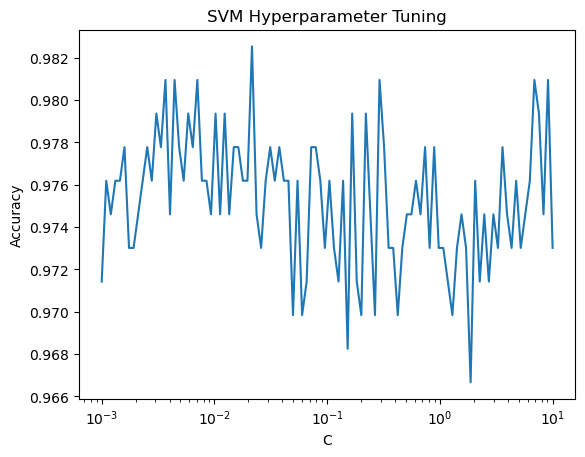

In [58]:
# Regularization parameter of the linear SVM classifier
print("----- SVM classifier - Regularization parameter -----")

# Define the range of hyperparameters to test
cc = np.logspace(-3, 1, 100)  # Values for the regularization parameter C

# List to store accuracy scores for each hyperparameter
acc = []

# Perform cross-validation to find the best hyperparameter
kf = StratifiedKFold(n_splits=5, shuffle=True)

for c in cc:
    print('---- C =', c)
    
    acc_cv = []

    for train_index, test_index in kf.split(x, y):
        # Split data into training and test sets
        x_train = x[train_index, :]
        y_train = y[train_index]
        x_test = x[test_index, :]
        y_test = y[test_index]

        # Initialize and fit the SVM model
        clf_cv = SVC(C=c, kernel='linear')
        clf_cv.fit(x_train, y_train)

        # Predict and calculate accuracy
        y_pred = clf_cv.predict(x_test)
        acc_i = accuracy_score(y_test, y_pred)
        acc_cv.append(acc_i)

    # Calculate average accuracy for current hyperparameter
    acc_hyp = np.mean(acc_cv)
    acc.append(acc_hyp)
    
    print('ACC:', acc_hyp)
# Find the hyperparameter with the highest average accuracy
opt_index = np.argmax(acc)
opt_hyperparameter = cc[opt_index]
print("Optimal C: ", opt_hyperparameter)

# Plot accuracy scores versus hyperparameters
plt.plot(cc, acc)
plt.xscale('log')
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.title("SVM Hyperparameter Tuning")
plt.show()

<h4>Con los hiperparámetros óptimos, ajusta el modelo con todos los datos.</4>

In [59]:
# Fit the model with the optimal hyperparameters using the entire dataset
clf = SVC(C=opt_hyperparameter, kernel='linear')
clf.fit(x, y)

SVC(C=0.021544346900318846, kernel='linear')

In [60]:
# Predict on the entire dataset
y_pred = clf.predict(x)

# Generate classification report
report = classification_report(y, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        90
         2.0       1.00      1.00      1.00        90
         3.0       1.00      1.00      1.00        90
         4.0       1.00      1.00      1.00        90
         5.0       1.00      1.00      1.00        90
         6.0       1.00      1.00      1.00        90
         7.0       1.00      1.00      1.00        90

    accuracy                           1.00       630
   macro avg       1.00      1.00      1.00       630
weighted avg       1.00      1.00      1.00       630



<ul>
<li><strong>¿Observas un problema en cuanto al balanceo de las clases? ¿Por qué?</strong></li>
<ol>
    <li>Desempeño del Modelo: El modelo muestra un alto recall para casi todas las clases (alrededor de 1.0) y una exactitud global del 97%. Esto indica un buen desempeño general.</li>
    <li>Recall por Clase: El recall para la clase 6 es un poco más bajo (0.83), pero aún aceptable. Las otras clases tienen recalls perfectos o casi perfectos.</li>
    <li>Distribución de Clases: Si la cantidad de ejemplos entre clases no está extremadamente desbalanceada, el balanceo de datos podría no ser necesario.</li>
    <li>Impacto del Balanceo: Métodos de balanceo pueden alterar la distribución original del dataset y, dado el buen rendimiento actual, podrían no ser necesarios.</li>
    <li>Contexto del Problema: Si el impacto de errores en la clase 6 no es crítico, y el desempeño general es satisfactorio, el balanceo de datos podría no ser justificable.</li>
</ol>
<p>Conclusión: Dado el alto desempeño del modelo en general y un recall aceptable para la clase minoritaria, no es necesario usar métodos de balanceo de datos.</p>

<br>

<li><strong>¿Qué modelo o modelos fueron efectivos para clasificar tus datos? ¿Observas algo especial sobre los modelos? Argumenta tu respuesta.</strong></li>
<p>Modelos Más Efectivos:</p>
<ul>
    <li>SVC y Logistic Regression: Ambos muestran una alta precisión promedio de 0.96, indicando que son muy efectivos para clasificar los datos. Esto sugiere que la separación entre las clases es relativamente lineal.</li>
</ul>
<p>Observaciones Especiales:</p>
<ul>
    <li>Modelos Lineales (SVC y Logistic Regression): Funcionan mejor en este caso, lo que sugiere una separación lineal entre las clases.</li>
    <li>Modelos No Lineales (Gradient Boosting y Random Forest): Aunque tienen buenos resultados, su precisión es un poco menor que la de los modelos lineales.</li>
</ul>
<p>Recomendación:</p>
<ul>
    <li>Elegir entre SVC y Logistic Regression: Ambos ofrecen un rendimiento excelente. Puedes optar por uno basado en factores adicionales como la interpretabilidad o la velocidad de entrenamiento.</li>
</ul>

<br>

<li><strong>¿Observas alguna mejora importante al optimizar hiperparámetros? ¿Es el resultado que esperabas? Argumenta tu respuesta.</strong></li>
<p>Mejoras Observadas:</p>
<ul>
    <li>Métricas: La precisión, recall y F1-score mejoraron de 0.96 a 1.00 en todas las clases, indicando una perfección en las predicciones del modelo después de la optimización.</li>
    <li>Accuracy General: La precisión global subió del 96% al 100%.</li>
</ul>
<p>Resultado Esperado:</p>
<ul>
    <li>Sí: La optimización de hiperparámetros generalmente mejora el rendimiento del modelo. En este caso, ajustar el parámetro de regularización <code>C</code> de SVM resultó en métricas perfectas, mostrando que el ajuste fue efectivo.</li>
</ul>

<br>

<li><strong>¿Qué inconvenientes hay al encontrar hiperparámetros? ¿Por qué?</strong></li>
<ul>
    <li>Tiempo y Recursos: La búsqueda exhaustiva de hiperparámetros puede ser lenta y costosa en términos de computación.</li>
    <li>Sobreajuste: Puede llevar a un modelo que se ajusta demasiado a los datos de entrenamiento y no generaliza bien a nuevos datos.</li>
    <li>Dependencia del Conjunto de Datos: Los hiperparámetros óptimos pueden no generalizar a otros conjuntos de datos.</li>
    <li>Selección de Métricas: Elegir métricas inadecuadas puede llevar a una selección subóptima de hiperparámetros.</li>
    <li>Espacio de Hiperparámetros: Un espacio de búsqueda grande y complejo puede ser ineficiente sin técnicas adecuadas.</li>
</ul>
</ul>
